<a href="https://colab.research.google.com/github/saitejakomaragiri/saitejakomaragiri/blob/main/project2_DS_ML_reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dsml- Sheet2 (1).csv to dsml- Sheet2 (1).csv


In [ ]:
data = pd.read_csv('dsml- Sheet2 (1).csv')
data.head()

,Name,Comment,Time,Likes,Reply Count
0,Simplilearn,🔥 Enroll for FREE Data Science Course &amp; Ge...,2020-11-27T12:50:48Z,21,2
1,manish kumar joshi,excellent,2021-06-14T11:50:43Z,0,1
2,Sidra Talib Official,Great information,2021-06-12T09:09:53Z,1,1
3,Rohit Samanta,How can student from different background(non ...,2021-06-09T14:20:28Z,2,2
4,Poojitha Pooja,Thank u for ur explaination,2021-06-06T13:29:11Z,1,1


In [ ]:
data.shape

(372, 5)

In [ ]:
# collecting only tweets from the given dataset

new_data = pd.DataFrame()
new_data['comment'] = data['Comment'].copy()

new_data

,comment
0,🔥 Enroll for FREE Data Science Course &amp; Ge...
1,excellent
2,Great information
3,How can student from different background(non ...
4,Thank u for ur explaination
...,...
367,Do you have to know how to code to become a da...
368,Liked even before watching video...
369,Thanx for this information
370,Thanks


In [ ]:
# function for cleaning the data

def cleantext(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\W*\d\w*', '', text)
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)

  return text

new_data['comment'] = new_data['comment'].apply(cleantext)

#show cleaned data 
new_data  



,comment
0,🔥 enroll for free data science course amp get ...
1,excellent
2,great information
3,how can student from different backgroundnon c...
4,thank u for ur explaination
...,...
367,do you have to know how to code to become a da...
368,liked even before watching video
369,thanx for this information
370,thanks


In [ ]:
# to remove emojis

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


new_data['comment'] = new_data['comment'].apply(deEmojify)

#show cleaned data 
new_data     


,comment
0,enroll for free data science course amp get y...
1,excellent
2,great information
3,how can student from different backgroundnon c...
4,thank u for ur explaination
...,...
367,do you have to know how to code to become a da...
368,liked even before watching video
369,thanx for this information
370,thanks


In [ ]:
# creating  a function for subjectivity
def createsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# creating a function for polarity
def createpolarity(text):
  return TextBlob(text).sentiment.polarity

# creating subjectivity and polarity columns

new_data['subjectivity'] = new_data['comment'].apply(createsubjectivity)   
new_data['polarity'] = new_data['comment'].apply(createpolarity) 

new_data

,comment,subjectivity,polarity
0,enroll for free data science course amp get y...,0.7250,0.425
1,excellent,1.0000,1.000
2,great information,0.7500,0.800
3,how can student from different backgroundnon c...,0.3625,0.000
4,thank u for ur explaination,0.0000,0.000
...,...,...,...
367,do you have to know how to code to become a da...,0.0000,0.000
368,liked even before watching video,0.8000,0.600
369,thanx for this information,0.0000,0.000
370,thanks,0.2000,0.200


In [ ]:
# creating a function to check +ve , -ve & neutral comments

def createanalysis(score):
  if (score < 0):
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
      return 'Positive'

new_data['analysis'] = new_data['polarity'].apply(createanalysis)

# showing the dataset
new_data

,comment,subjectivity,polarity,analysis
0,enroll for free data science course amp get y...,0.7250,0.425,Positive
1,excellent,1.0000,1.000,Positive
2,great information,0.7500,0.800,Positive
3,how can student from different backgroundnon c...,0.3625,0.000,Neutral
4,thank u for ur explaination,0.0000,0.000,Neutral
...,...,...,...,...
367,do you have to know how to code to become a da...,0.0000,0.000,Neutral
368,liked even before watching video,0.8000,0.600,Positive
369,thanx for this information,0.0000,0.000,Neutral
370,thanks,0.2000,0.200,Positive


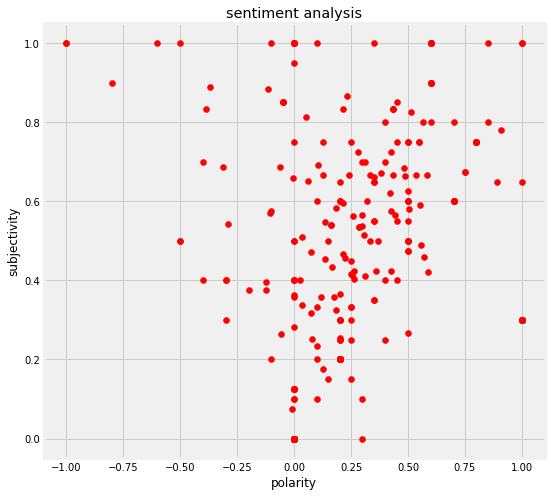

In [ ]:
# plotting a scatter plot 

plt.figure(figsize=(8,8))
for i in range(0, data.shape[0]):
  plt.scatter(new_data['polarity'][i], new_data['subjectivity'][i], color = 'Red')

plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentiment analysis')
plt.show()

# inference: most of the comments are on the positive polarity

In [ ]:
#number of positive , negative & neutral comments comments
poscomments = 0
neutralcomments = 0
negcomments = 0

for i in range (0, data.shape[0]):
  if (new_data['analysis'][i] == 'Positive'):
    poscomments = poscomments+1
  elif (new_data['analysis'][i] == 'Neutral'):
    neutralcomments = neutralcomments+1
  else :
      negcomments = negcomments+1

print('number of positive comments :',poscomments)
print('number of neutral comments :',neutralcomments)
print('number of negative comments :',negcomments)   

number of positive comments : 192
number of neutral comments : 148
number of negative comments : 32


In [ ]:
#number of positive , negative & neutral comments comments

print('percentage of positive comments :', round((poscomments/new_data.shape[0])*100, 1),'%')

print('percentage of neutral comments :', round((neutralcomments/new_data.shape[0])*100, 1),'%')

print('percentage of negative comments :', round((negcomments/new_data.shape[0])*100, 1),'%')

percentage of positive comments : 51.6 %
percentage of neutral comments : 39.8 %
percentage of negative comments : 8.6 %
